Gəlir proqnozlaşdırıcısı

Bu layihədə mən gəlir siyahıyaalma məlumat datasinda maşın öyrənmə alqoritmlərindən istifadə edəcəyəm və insanları 50 min dollardan az və ya bərabər olan gəlirlərlə 50 min dollardan çox gəlir arasında təsnif edəcəyəm.

Məlumat ilə işləmək üçün numpy, pandas və matplotlib import edirəm. Sonra maşın öyrənmə modellərindən istifadə etmək üçün sklearn istifadə edəcəyəm.

In [4]:
# Working with data
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore');

In [5]:
dataset = pd.read_csv('income_evaluation.csv')
dataset.rename(columns={"age": "Age", " workclass": "Work Class"," fnlwgt":"Final Weight"," education":"Education"," education-num":"Education Number"," marital-status":"Marital Status",
                   " occupation":"Occupation"," relationship":"Relationship"," race":"Race"," sex":"Sex"," capital-gain":"Capital Gain"," capital-loss":"Capital Loss"," hours-per-week":"Hours per Week"," native-country":"Country"," income":"Income"}, inplace=True)

Hər hansı bir analizdən əvvəl hədəf sütununu ədədi siniflərə çevirək.

In [3]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
dataset['Income'] = labelEncoder.fit_transform(dataset['Income'])

Tədqiqat təhlili və məlumatların işlənməsi

məlumatlara nəzər salacağam və daha yaxşı başa düşmək üçün vizual görüntülər istifade edecem. Əvvəlcə məlumatları ümumilikdə nəzərdən keçirəcəyəm və sonra hər sütunu bir-bir çıxarmağa çalışacağam.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work Class        32561 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital Loss      32561 non-null  int64 
 12  Hours per Week    32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


məlumat dəstində itkin dəyərlərin olmadığını göruruk.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Final Weight'}>],
       [<AxesSubplot:title={'center':'Education Number'}>,
        <AxesSubplot:title={'center':'Capital Gain'}>],
       [<AxesSubplot:title={'center':'Capital Loss'}>,
        <AxesSubplot:title={'center':'Hours per Week'}>]], dtype=object)

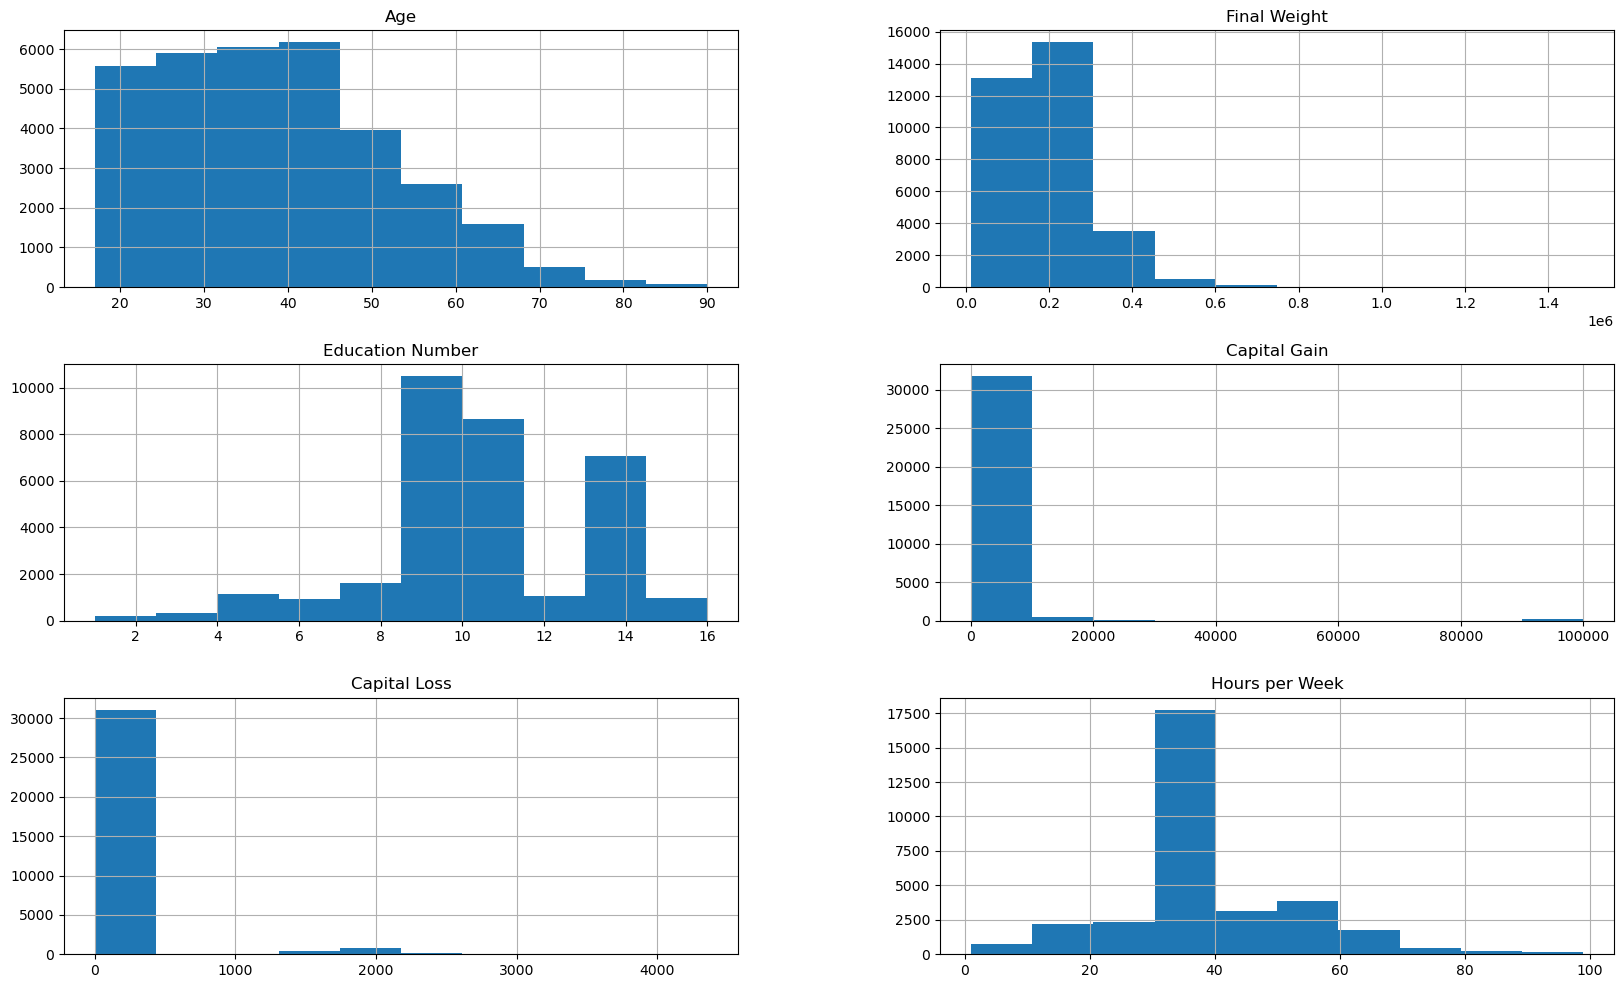

In [5]:
rcParams['figure.figsize'] = 20, 12
dataset[['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per Week']].hist()



Yuxarıdakı histoqramlardan aşağıdakı nəticəni çıxara bilərəm:

    "Yaş" sütununu qruplaşdıra bilərəm.
    Kapital qazancına və itkisinə gəldikdə, məlumatlar çox təhrif olunur(Left Skewed), bu da düzəldilməlidir.
    Təhsil göstəricilərinin daha da təhlilini aparmalıyıq, çünki bunlar təhsil məlumatları ilə üst-üstə düşə bilər.
    Final Weight də left skewed olaraq qalır.
    Həftədə saat sayı da bloklara bölünə bilər.

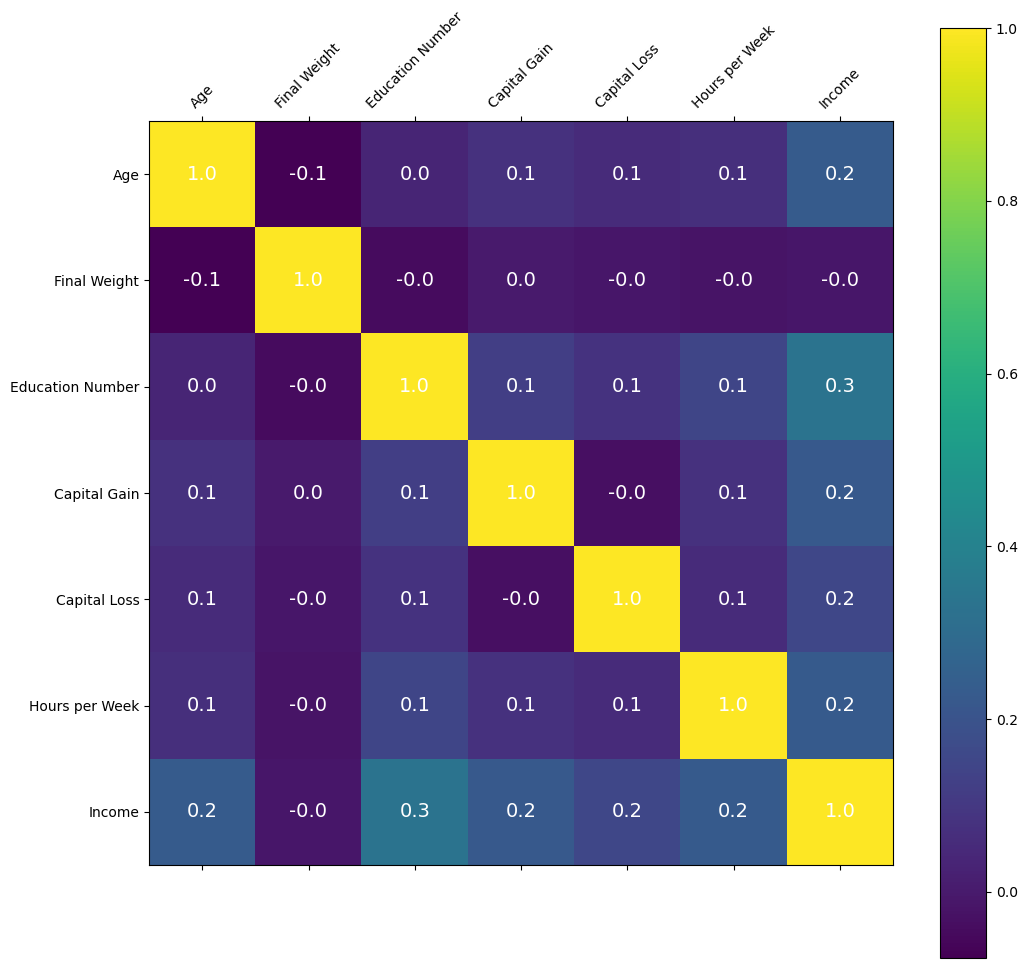

In [6]:
plt.matshow(dataset.corr())
plt.colorbar()
plt.xticks(np.arange(len(dataset.corr().columns)), dataset.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(dataset.corr().columns)), dataset.corr().columns.values) 
for (i, j), corr in np.ndenumerate(dataset.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

Yuxarıdakı korrelyasiya matrisinə nəzər saldıqda aydın olur ki, davamlı əlamətlərdən hər hansı biri ilə hədəf dəyişən arasında çox yüksək xətti korrelyasiya yoxdur. Bundan əlavə, Final weight hedef sinfi ilə sıfır korrelyasiyaya malikdir və buna görə də bu sütunu daha sonra siləcəyəm.

İndi hesablama qrafikindən istifadə edərək kateqoriyalı əlamətləri təhlil edəcəyəm.
Yaş

Burada yaşı ayrı guruplara ayıracağam.

    0-25: Gənc
    25-50: Yetkin
    50-100: qoca

In [7]:
dataset['Age'] = pd.cut(dataset['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])            



<AxesSubplot:xlabel='Age', ylabel='count'>

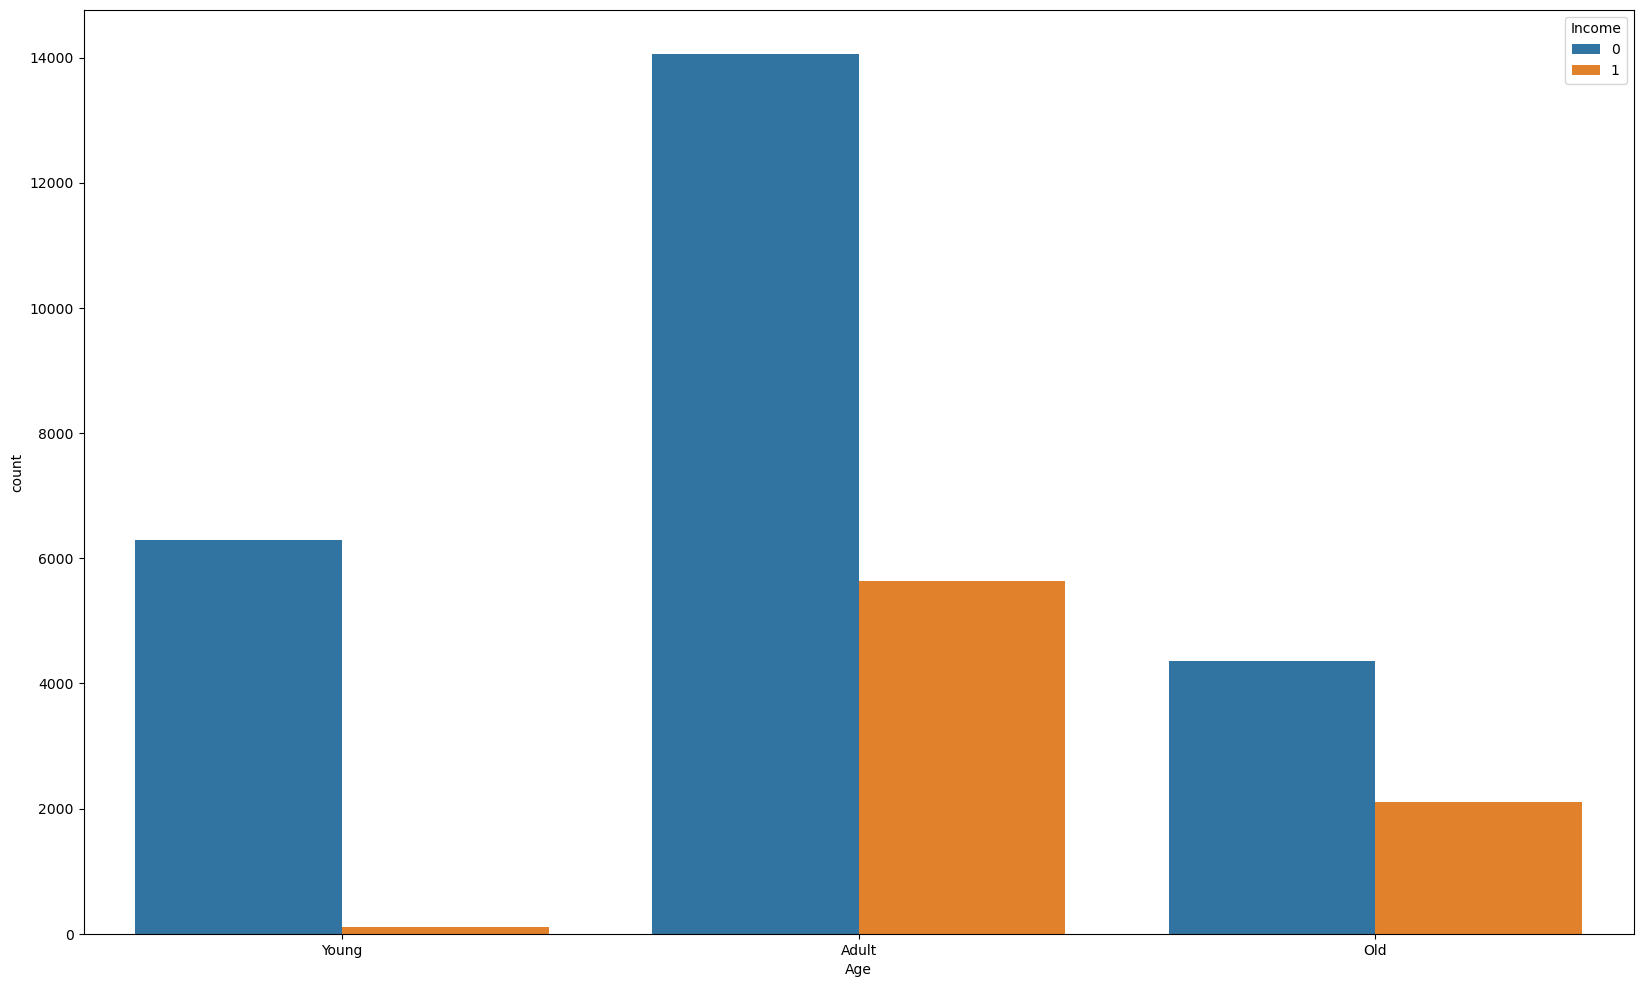

In [8]:
sns.countplot(x = 'Age', hue = 'Income', data = dataset)



50 min dollardan çox gəliri olan gənclərin nisbətən az olduğu görünür.

Kapital qazancı və kapital itkisi

Həm kapital qazancına, həm də kapital itkisi əvəzinə, fərqlərindən istifadə edəcəyəm, çünki bu daha aktualdır və dəyişiklik verir.

In [9]:
dataset['Capital Diff'] = dataset['Capital Gain'] - dataset['Capital Loss']
dataset.drop(['Capital Gain'], axis = 1, inplace = True)
dataset.drop(['Capital Loss'], axis = 1, inplace = True)

<AxesSubplot:xlabel='Capital Diff', ylabel='count'>

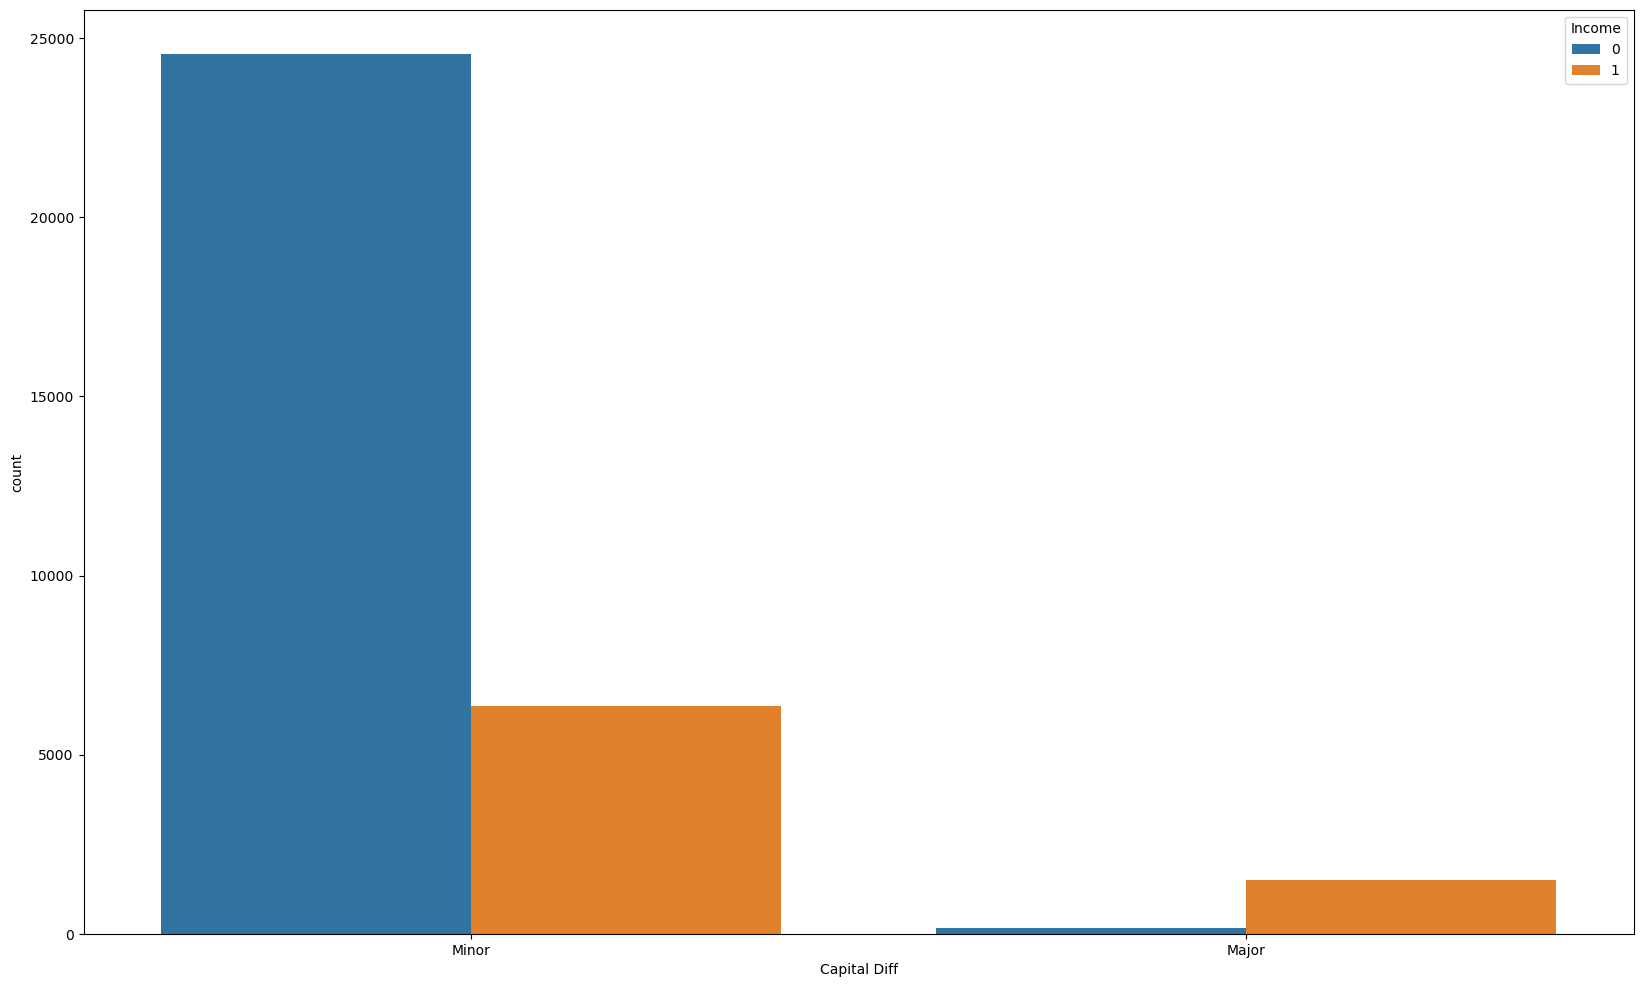

In [10]:
dataset['Capital Diff'] = pd.cut(dataset['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'Capital Diff', hue = 'Income', data = dataset)

Nəticəyə baxanda görürəm ki, Minor qrupunda 50 min dollardan az, Major qrupunda isə 50 min dollardan çox gəliri olan daha çox insan var. Bu, kapital itkisi ilə müqayisədə böyük kapital qazancı olan insanların 50 min dollardan çox gəlir əldə etməsi ilə tamamilə uyğundur.
final weight

Yuxarıda göründüyü kimi, gəlir və son çəki arasında heç bir əlaqə yoxdur, ona görə də bu sütunu silecem.

In [11]:
dataset.drop(['Final Weight'], axis = 1, inplace = True)

Həftədə saatlar

histoqrama baxaraq, məlumat dəstinin mərkəzləşdiyini görürəm. Mən hələ də bu məlumatlardan gruplar yarada bilərəm. Həmişə olduğu kimi, iş saatları 30-40 saata yaxındır, 0-30, 30-40 və 40-100 kimi seqmentlər yaradıram.

In [12]:
dataset['Hours per Week'] = pd.cut(dataset['Hours per Week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

<AxesSubplot:xlabel='Hours per Week', ylabel='count'>

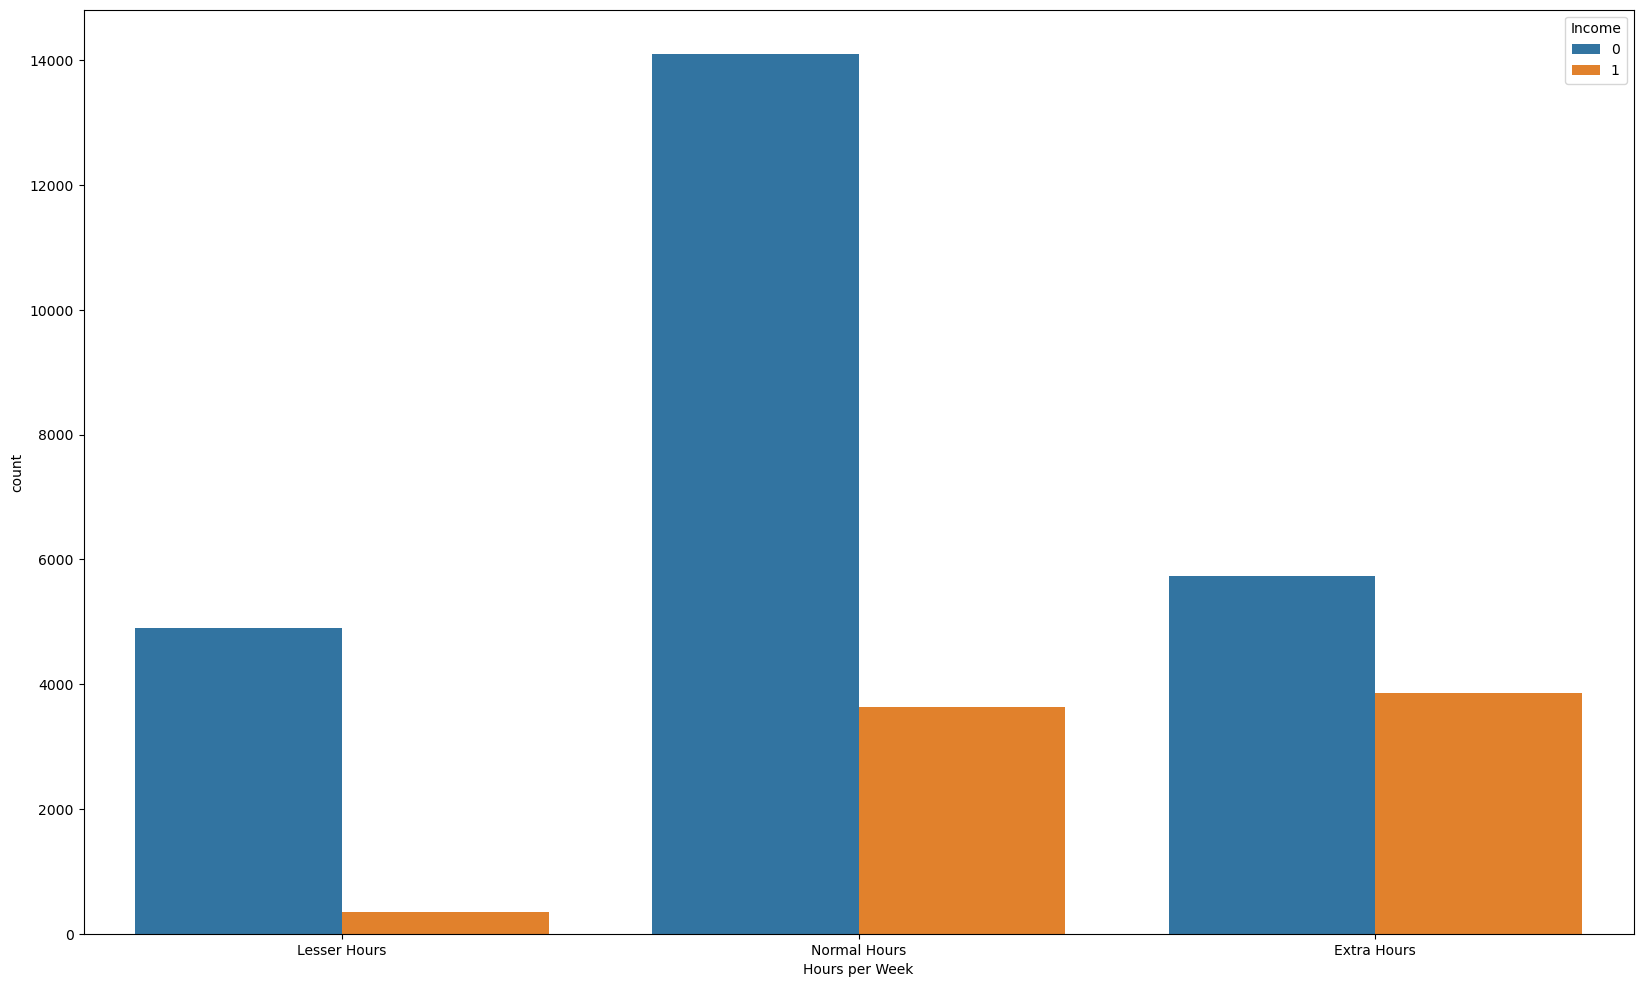

In [13]:
sns.countplot(x = 'Hours per Week', hue = 'Income', data = dataset)

Yuxarıdakı qrafikə baxaraq tendensiyanı görə bilərik. Saatlar artdıqca, 50 min dollardan çox qazananların sayı daha az qazananlara nisbətən artır.

<AxesSubplot:xlabel='Work Class', ylabel='count'>

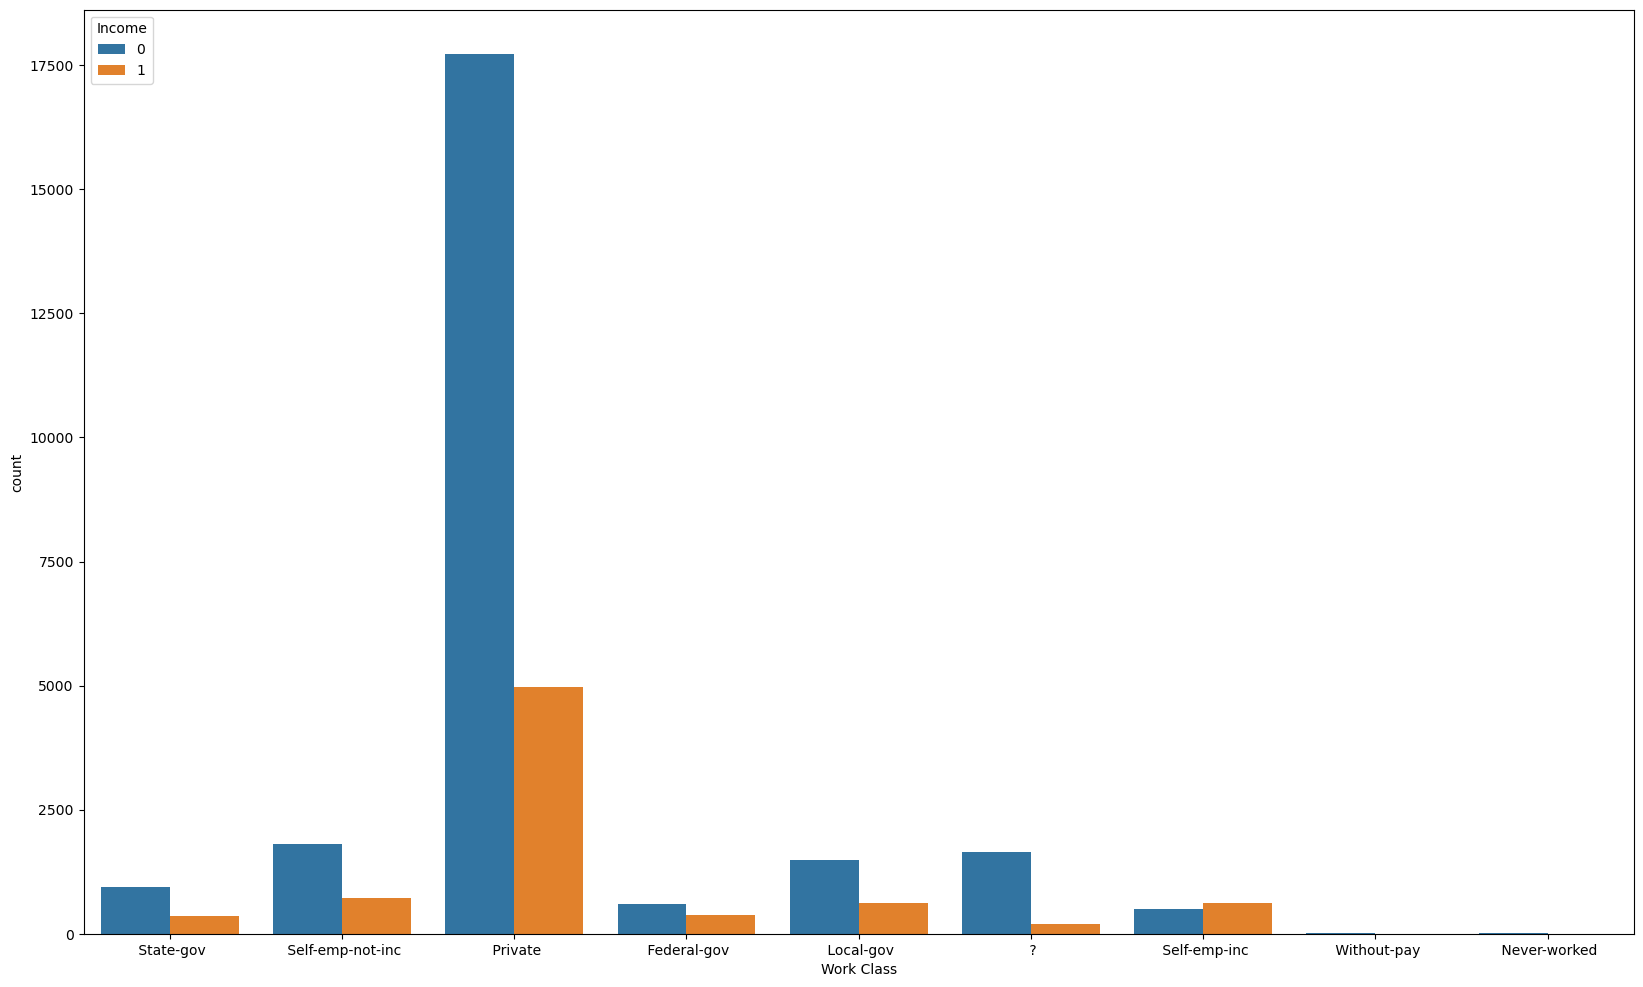

In [14]:
sns.countplot(x = 'Work Class', hue = 'Income', data = dataset)

Yuxarıdakı qrafikə nəzər saldıqda görürəm ki, işçi sinif dəyərləri '?' ile  müəyyən edilir  hansı ki, səhv məlumatlarıdır. Çox az olduğundan, sadəcə bu qeydləri siləcəyəm. Bundan əlavə, "ödənişsiz" və "heç vaxt işləməmiş" iki mənasız əhəmiyyətsiz sutunlari eminlikle atıla bilər

In [15]:
dataset = dataset.drop(dataset[dataset['Work Class'] == ' ?'].index)
dataset = dataset.drop(dataset[dataset['Work Class'] == ' Without-pay'].index)
dataset = dataset.drop(dataset[dataset['Work Class'] == ' Never-worked'].index)

Təhsil və təhsil nömrəsi

İndi təhsil və təhsil müəssisəsinin nömrəsi arasında hər hansı bir əlaqənin olub olmadığını yoxlamaq üçün yaxşı vaxtdır.

<AxesSubplot:xlabel='Education', ylabel='count'>

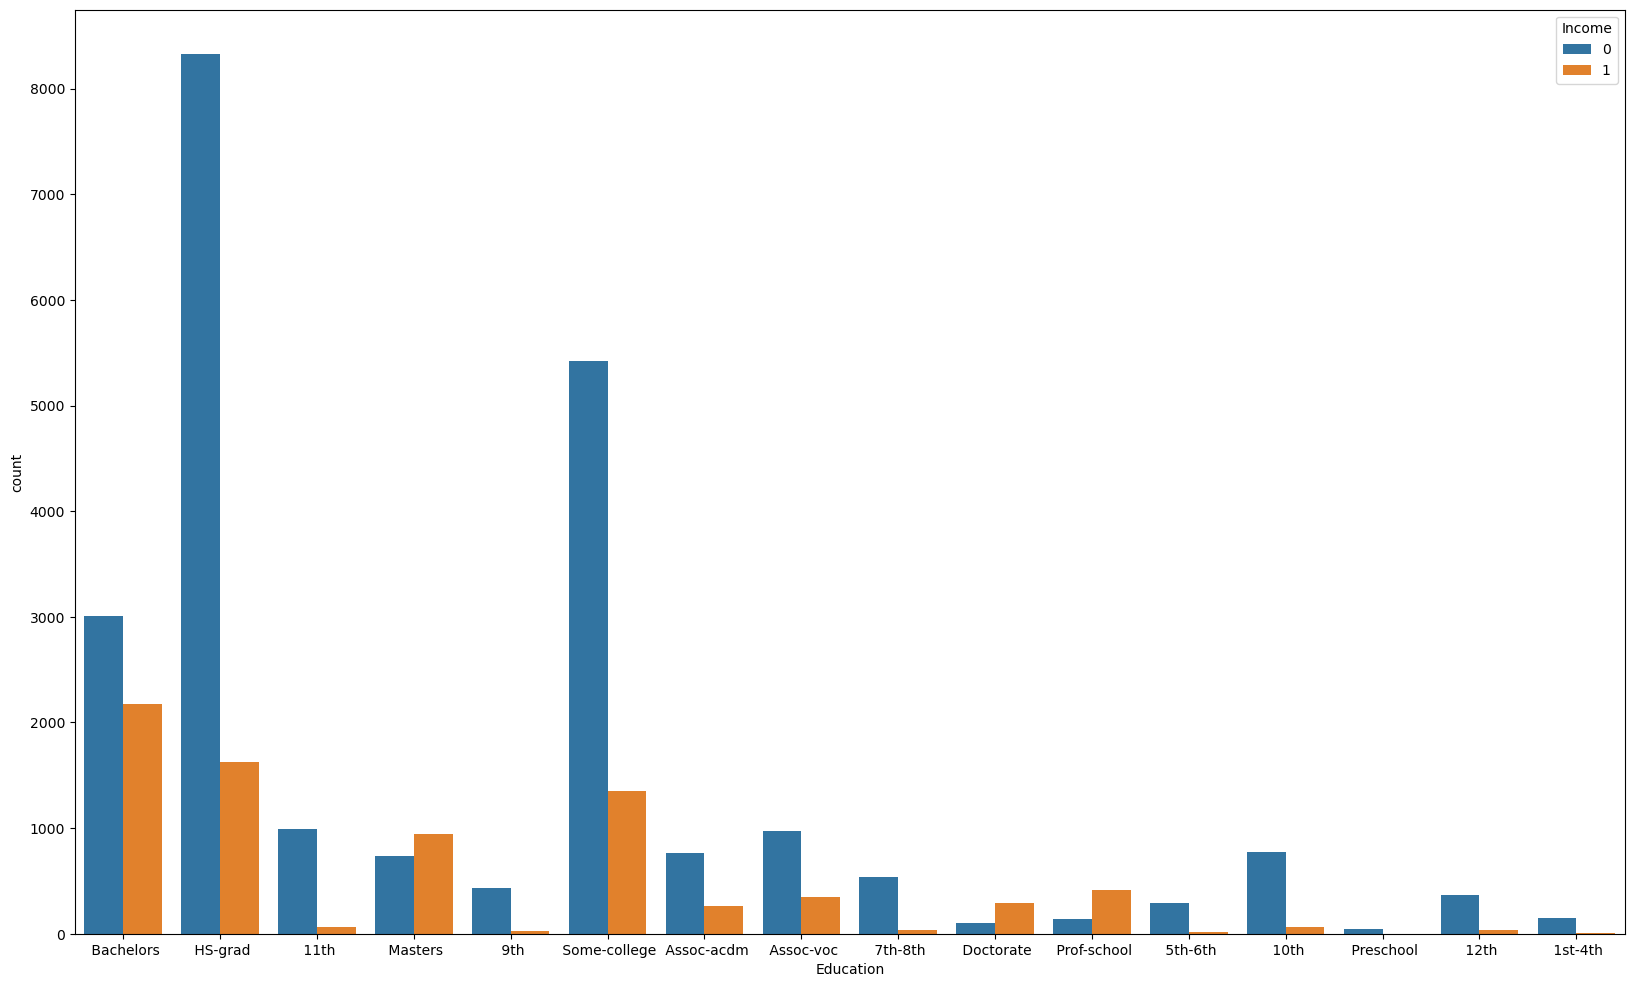

In [16]:
sns.countplot(x = 'Education', hue = 'Income', data = dataset)

In [17]:
education_classes = dataset['Education'].unique()
for edu_class in education_classes:
    print("For {}, the Education Number is {}"
          .format(edu_class, dataset[dataset['Education'] == edu_class]['Education Number'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]
For  1st-4th, the Education Number is [2]


Yuxarıdakı təhlildən gördüm ki, təhsil müəssisələrinin sayı və təhsil səviyyəsi eynidir. Beləliklə, hər hansı bir sütunu silə bilərəm. Bundan əlavə, məktəbəqədər yaşdan 12-ci sinfə qədər olan bütün məlumatları birləşdirəcəyəm, çünki bunlar kollec / universitet səviyyəsində təhsili olmayan bir sinfə aid edilə bilər.

In [18]:
dataset.drop(['Education Number'], axis = 1, inplace = True)
dataset['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
dataset['Education'].value_counts()

 HS-grad         9959
 Some-college    6772
 Bachelors       5182
 School          3820
 Masters         1675
 Assoc-voc       1321
 Assoc-acdm      1019
 Prof-school      558
 Doctorate        398
Name: Education, dtype: int64

Ailə vəziyyəti və münasibətləri

In [19]:
dataset['Marital Status'].value_counts()

 Married-civ-spouse       14331
 Never-married             9908
 Divorced                  4258
 Separated                  959
 Widowed                    839
 Married-spouse-absent      388
 Married-AF-spouse           21
Name: Marital Status, dtype: int64

In [20]:
dataset['Relationship'].value_counts()

 Husband           12700
 Not-in-family      7865
 Own-child          4520
 Unmarried          3269
 Wife               1432
 Other-relative      918
Name: Relationship, dtype: int64

Hər ikisinin itkin dəyərləri yoxdur. Bu iki anlayış arasında bəzi üst-üstə düşmə var, məsələn, bir şəxs ər və ya arvaddırsa, onların ailə vəziyyəti evlilik olacaqdır. Ancaq tam uyğunluq olmadığı üçün bu dinamiklərin hər ikisini saxlayacağam.

Məşğulluq

<AxesSubplot:xlabel='Occupation', ylabel='count'>

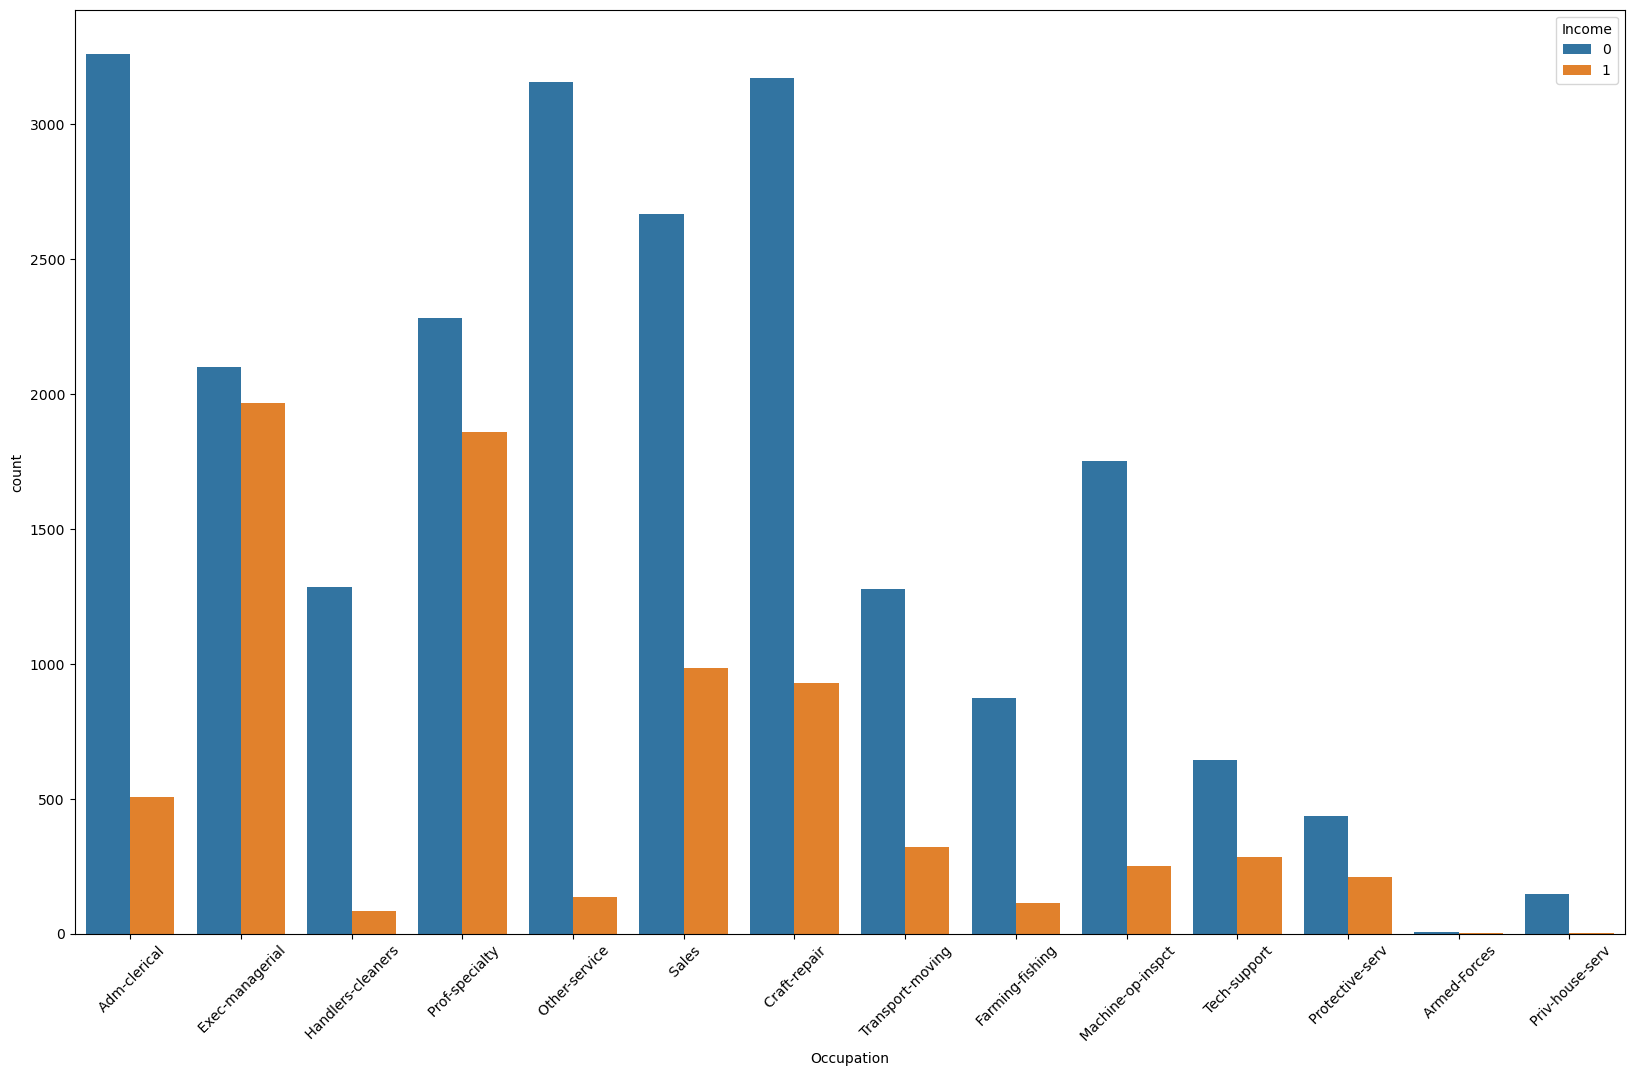

In [21]:
plt.xticks(rotation = 45)
sns.countplot(x = 'Occupation', hue = 'Income', data = dataset)

Məlumatlarda itkin dəyərlər yoxdur. Kateqoriyalar artıq birmənalı şəkildə müəyyən edilmişdir və biz hər şeyi olduğu kimi saxlaya bilərik.

irq

<AxesSubplot:xlabel='Race', ylabel='count'>

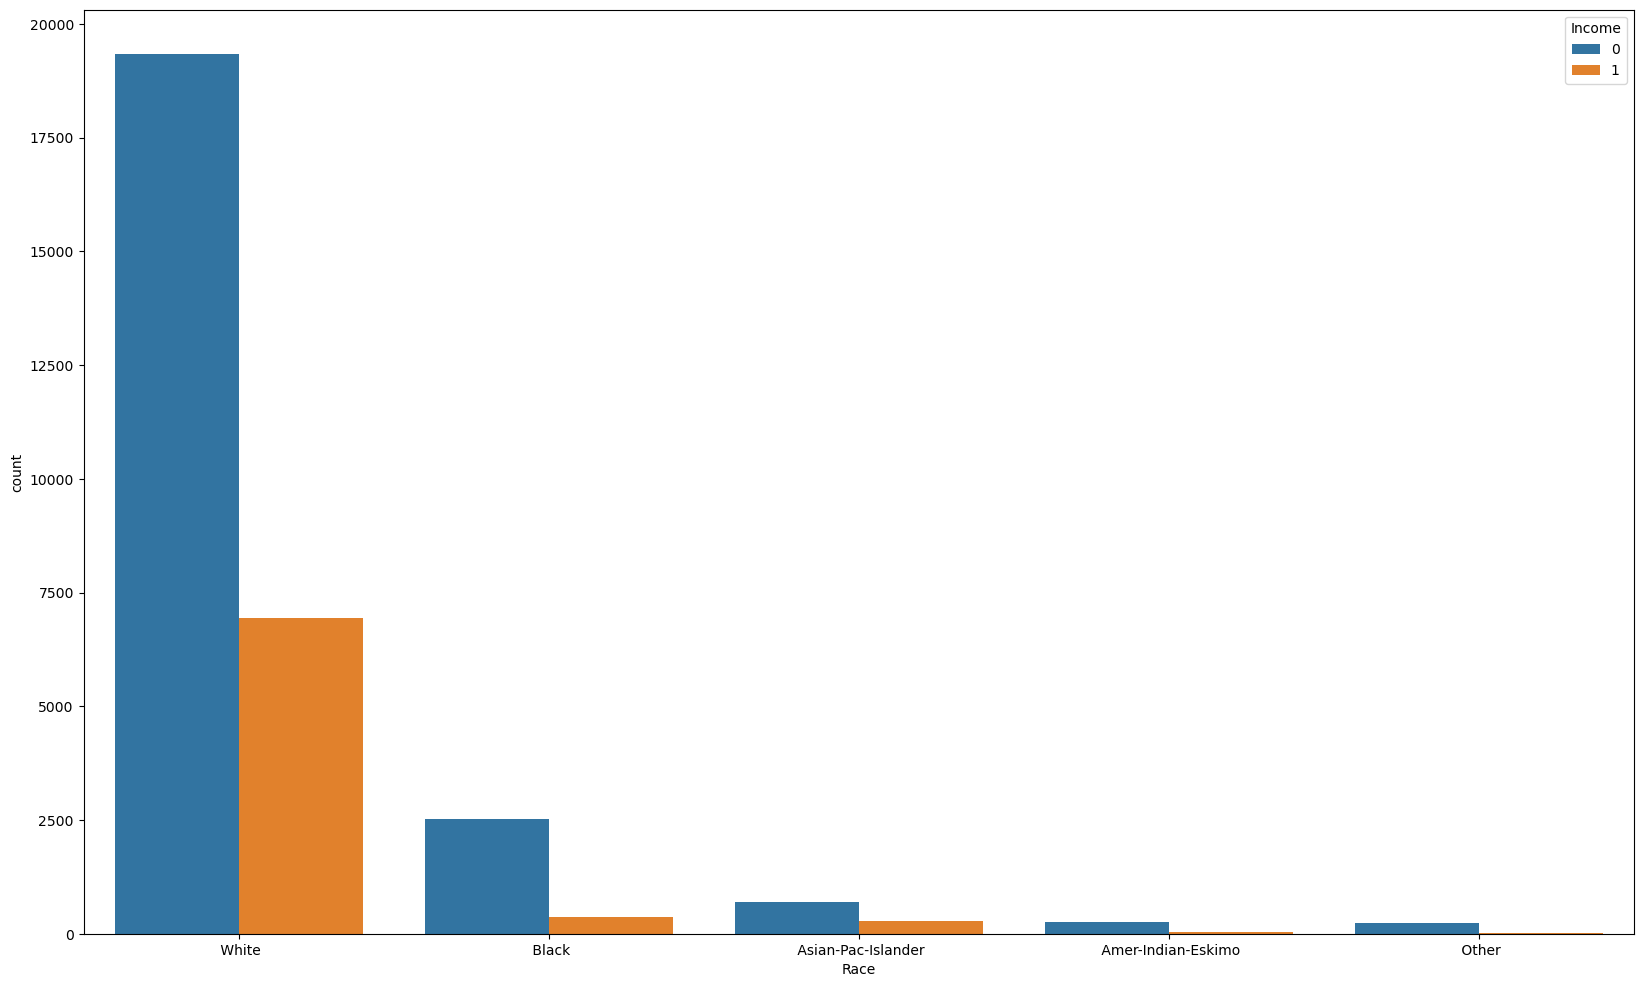

In [22]:
sns.countplot(x = 'Race', hue = 'Income', data = dataset)

Məlumat dəsti ağ irq haqqında məlumatların çoxunu ehtiva edir, digər irqlər isə daha azdır. Bütün digər irq məlumatlarını digərləri kimi bir sinfə birləşdirəcəyəm.

In [23]:
dataset['Race'].unique()
dataset['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

Cinsiyyet

<AxesSubplot:xlabel='Sex', ylabel='count'>

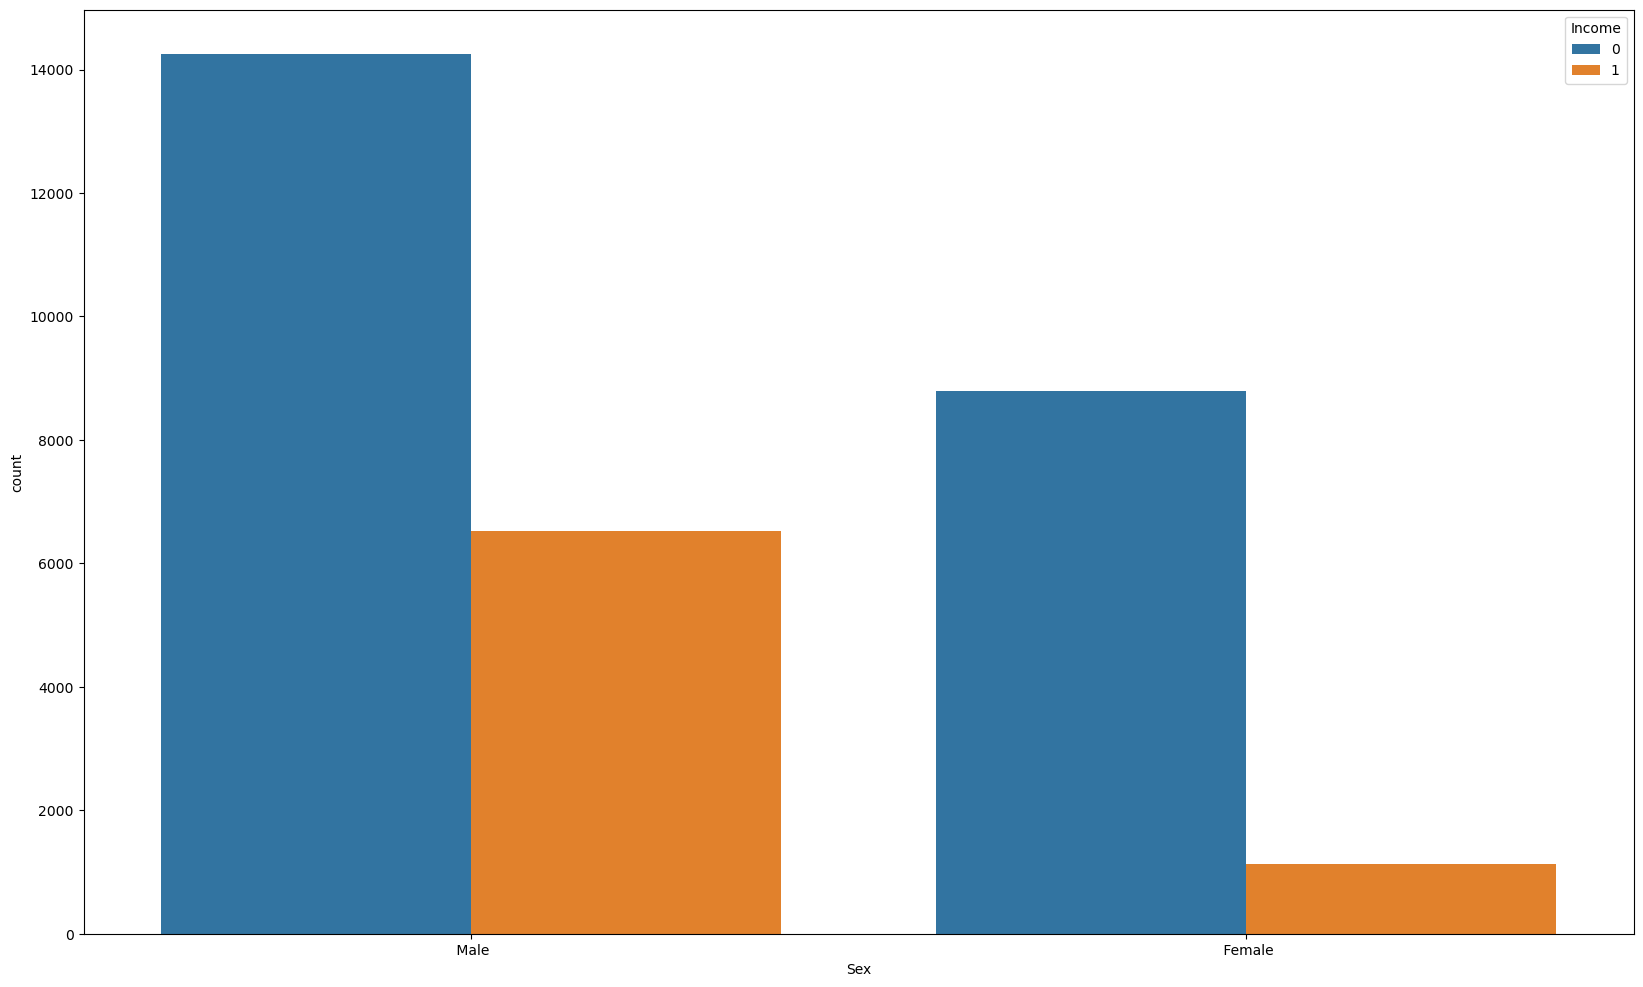

In [24]:
sns.countplot(x = 'Sex', hue = 'Income', data = dataset)

Yuxarıdakı qrafikdən aydın olur ki

    Kişi deyerleri  qadınlardan daha çox
    İki cinsi və müvafiq gəlir bölgüsünü müqayisə etdikdə, kişilərin daha böyük bir hissəsinin qadınlara nisbətən 50 min dollardan çox gəliri var.

Ölkəler

In [25]:
country_count = dataset['Country'].value_counts()
country_count

 United-States                 27491
 Mexico                          610
 ?                               556
 Philippines                     187
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

Text(0.5, 1.0, 'Total adults from each Country')

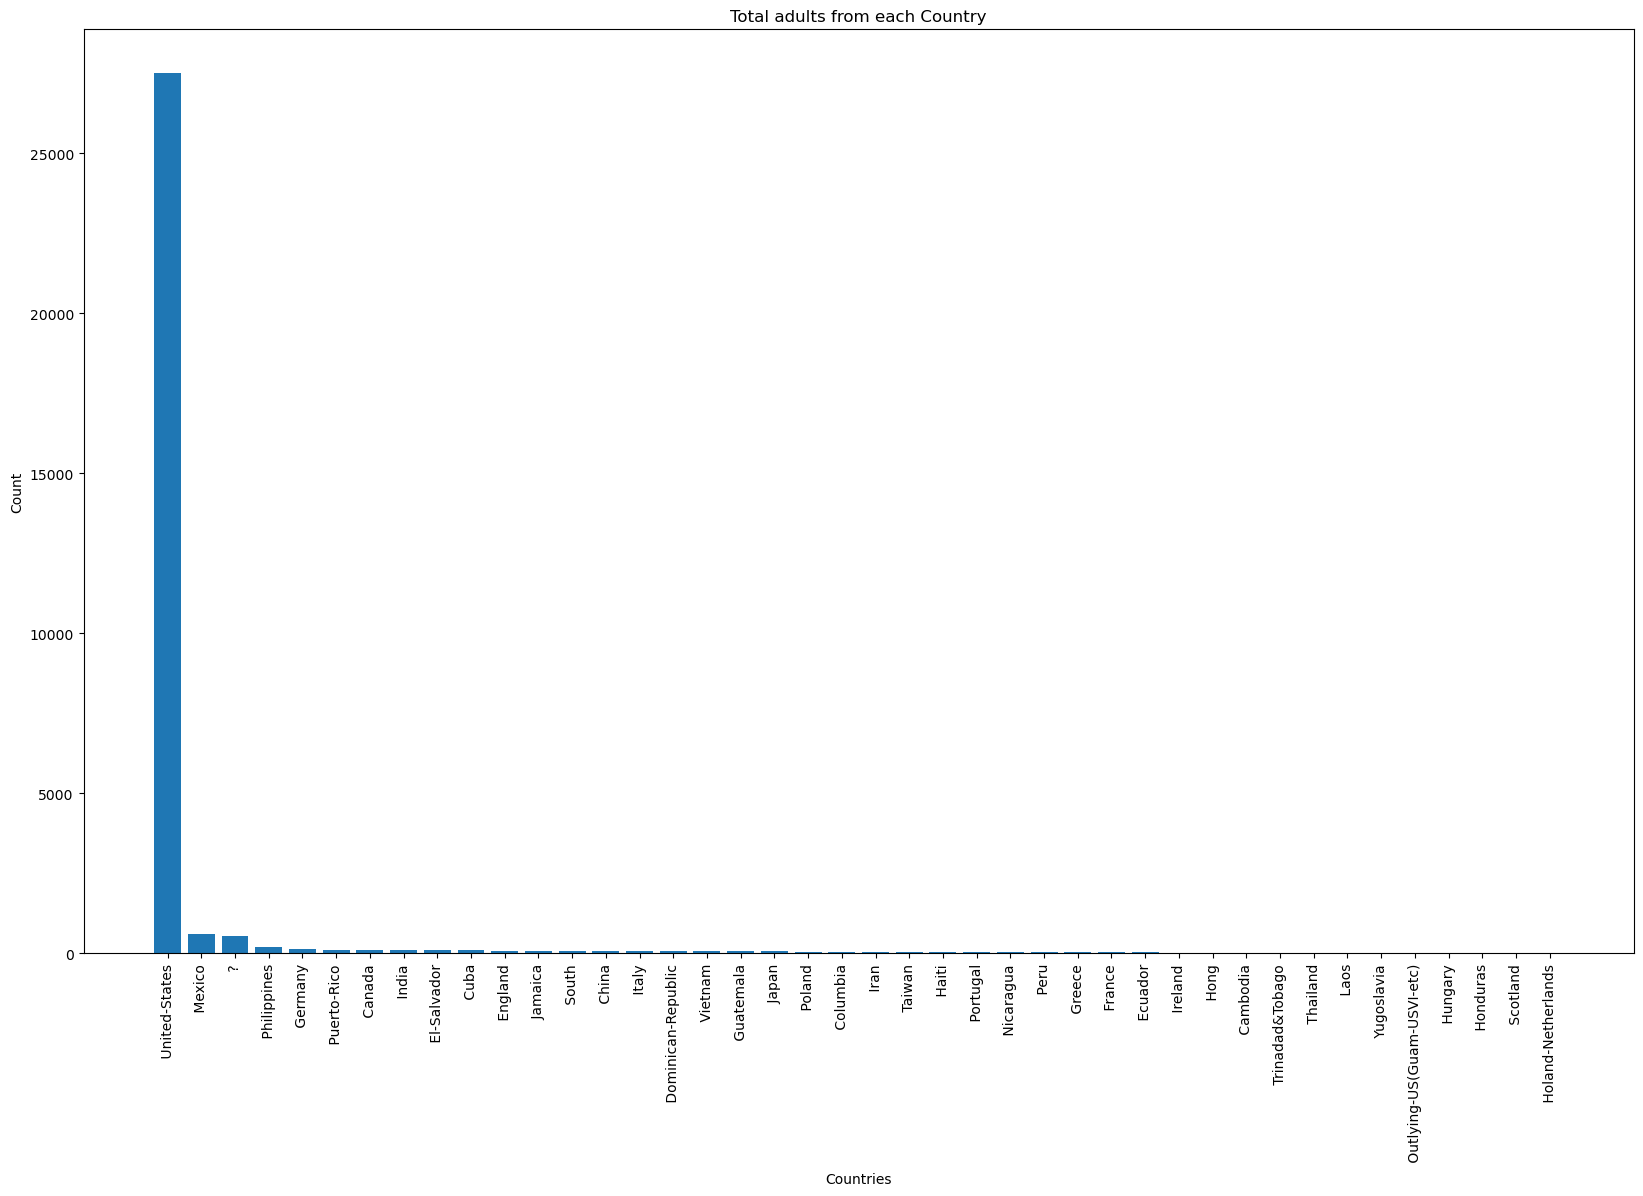

In [26]:
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

Gördüyüm iki şey var:

     ? Simvolla göstərilən "Ölkə" sütununda bəzi dəyərlər yoxdur. Çox az olduğundan bu sətirləri atacam.
    melumatlarin əksəriyyəti ABŞ-dan gəlir. Beləliklə, sütunu ya ABŞ, ya da digərləri kimi dəyərlərlə paylaya bilərik.

In [27]:
dataset = dataset.drop(dataset[dataset['Country'] == ' ?'].index)

In [28]:
countries = np.array(dataset['Country'].unique())
countries = np.delete(countries, 0)

In [29]:
dataset['Country'].replace(countries, 'Other', inplace = True)

<AxesSubplot:xlabel='count', ylabel='Country'>

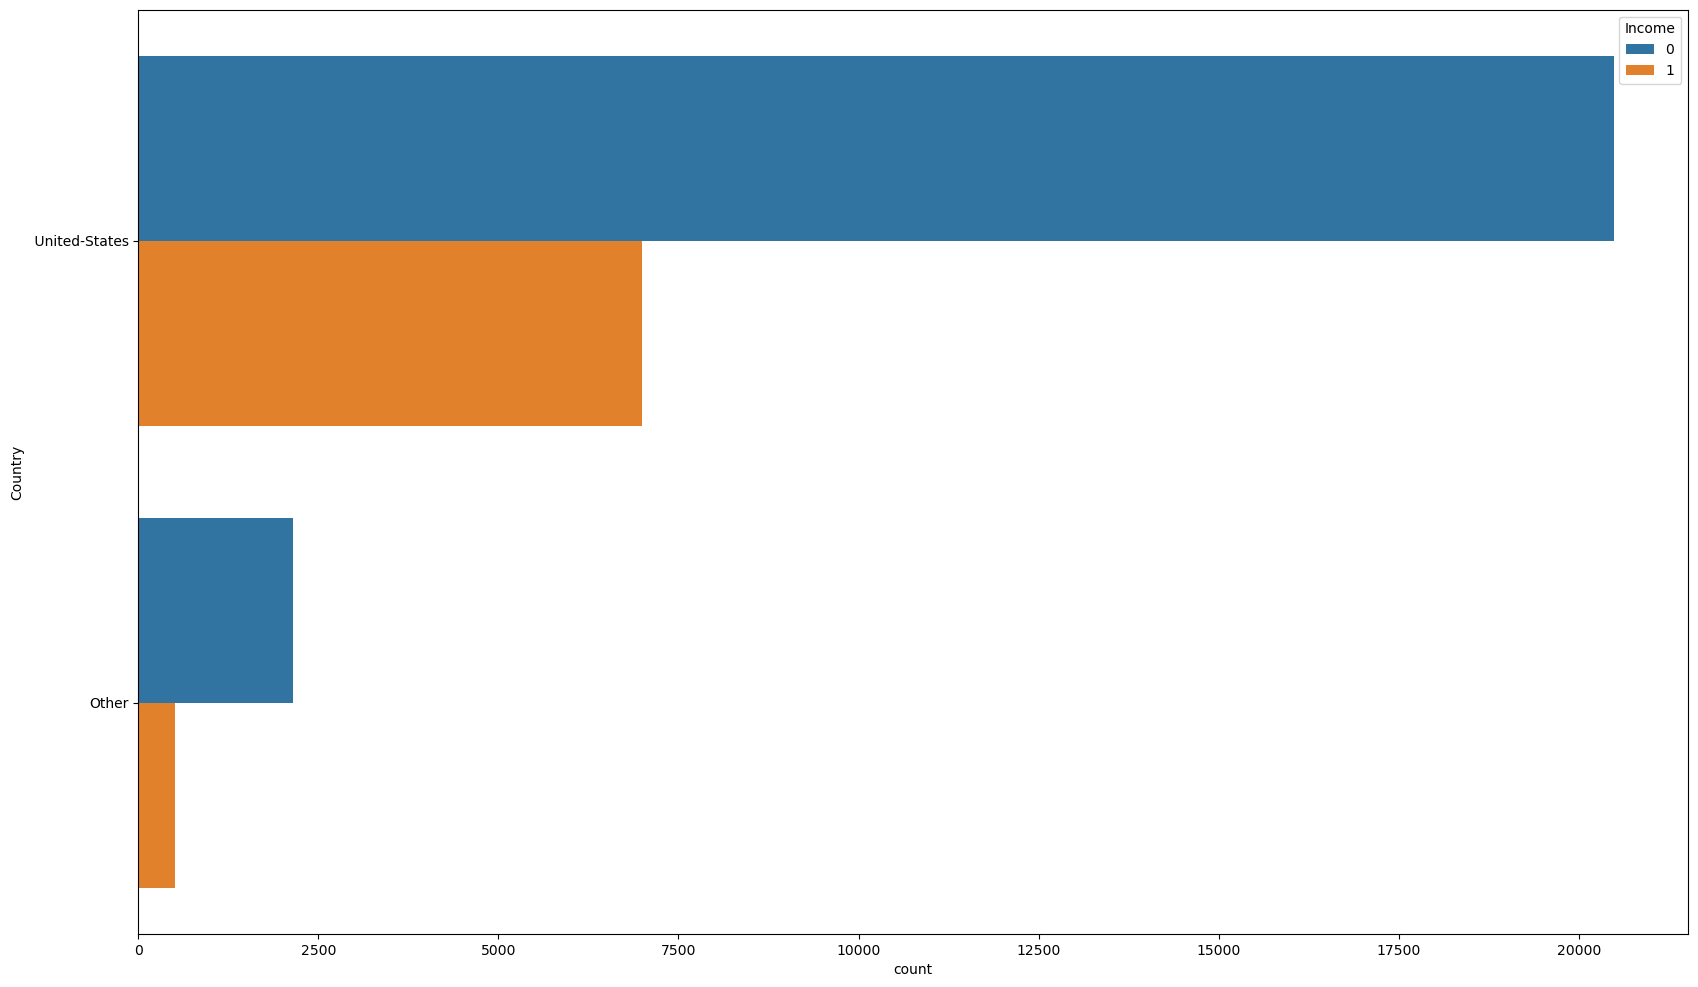

In [30]:
sns.countplot(y = 'Country', hue = 'Income', data = dataset)

İndi məlumatlar daha yaxşı görünür.

Bütün sütunları təhlil etdim. Mən sadəcə kateqoriyalı sütunları ədədi sütunlara çevirecem.


qalan bütün sütunları götürəcəyəm və onlardan ədədi dəyərlər yaradacağam.

Məlumat dəstindəki unikal dəyərlərə əsaslanaraq hər bir obyekt üçün ayrı sütunlar əldə etmək üçün pandas ' ın get_dummies metodundan istifadə edəcəyəm.

In [31]:
y = dataset['Income']
X = dataset.drop(['Income'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

Total features: 56


Sonra, train_test_split istifadə edərək məlumat dəstini təlim və test məlumatlarına ayıracağam.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

İndi maşın öyrənməsine başlamağa hazırıq.

Maşın öyrənməsinin tətbiqi
təsnifat yaratmaq üçün 5 alqoritm tətbiq edəcəyəm.

In [33]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [34]:


classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 0), 
               GradientBoostingClassifier(random_state = 0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier"]
accuracies = []



In [36]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
   
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

Gaussian Naive Bayes:
Support Vector Classifier:
Decision Tree Classifier:
Random Forest Classifier:
Gradient Boosting Classifier:


Nəticələrin təhlili

Nəticələri təhlil etmək üçün dəqiqlik qrafiki və ROC əyrisindən istifadə edirəm.|

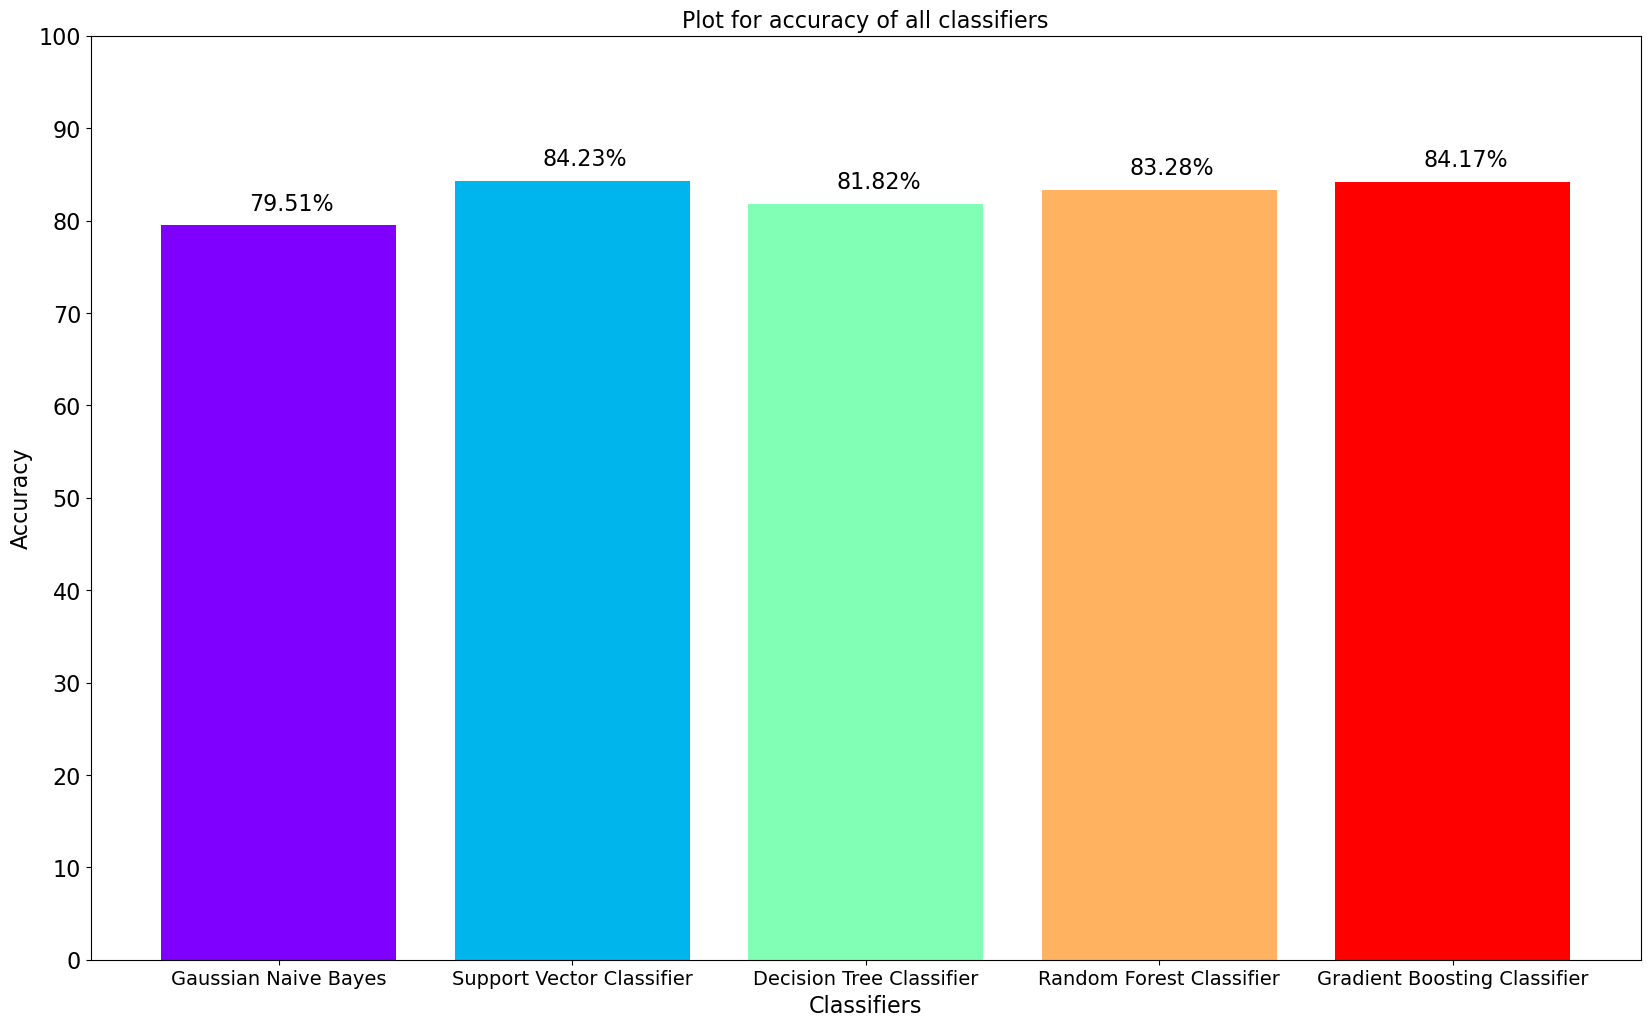

In [37]:
from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

ROC 

50 min dollardan çox gəlir proqnozu üçün ROC əyrisini də təhlil edək.

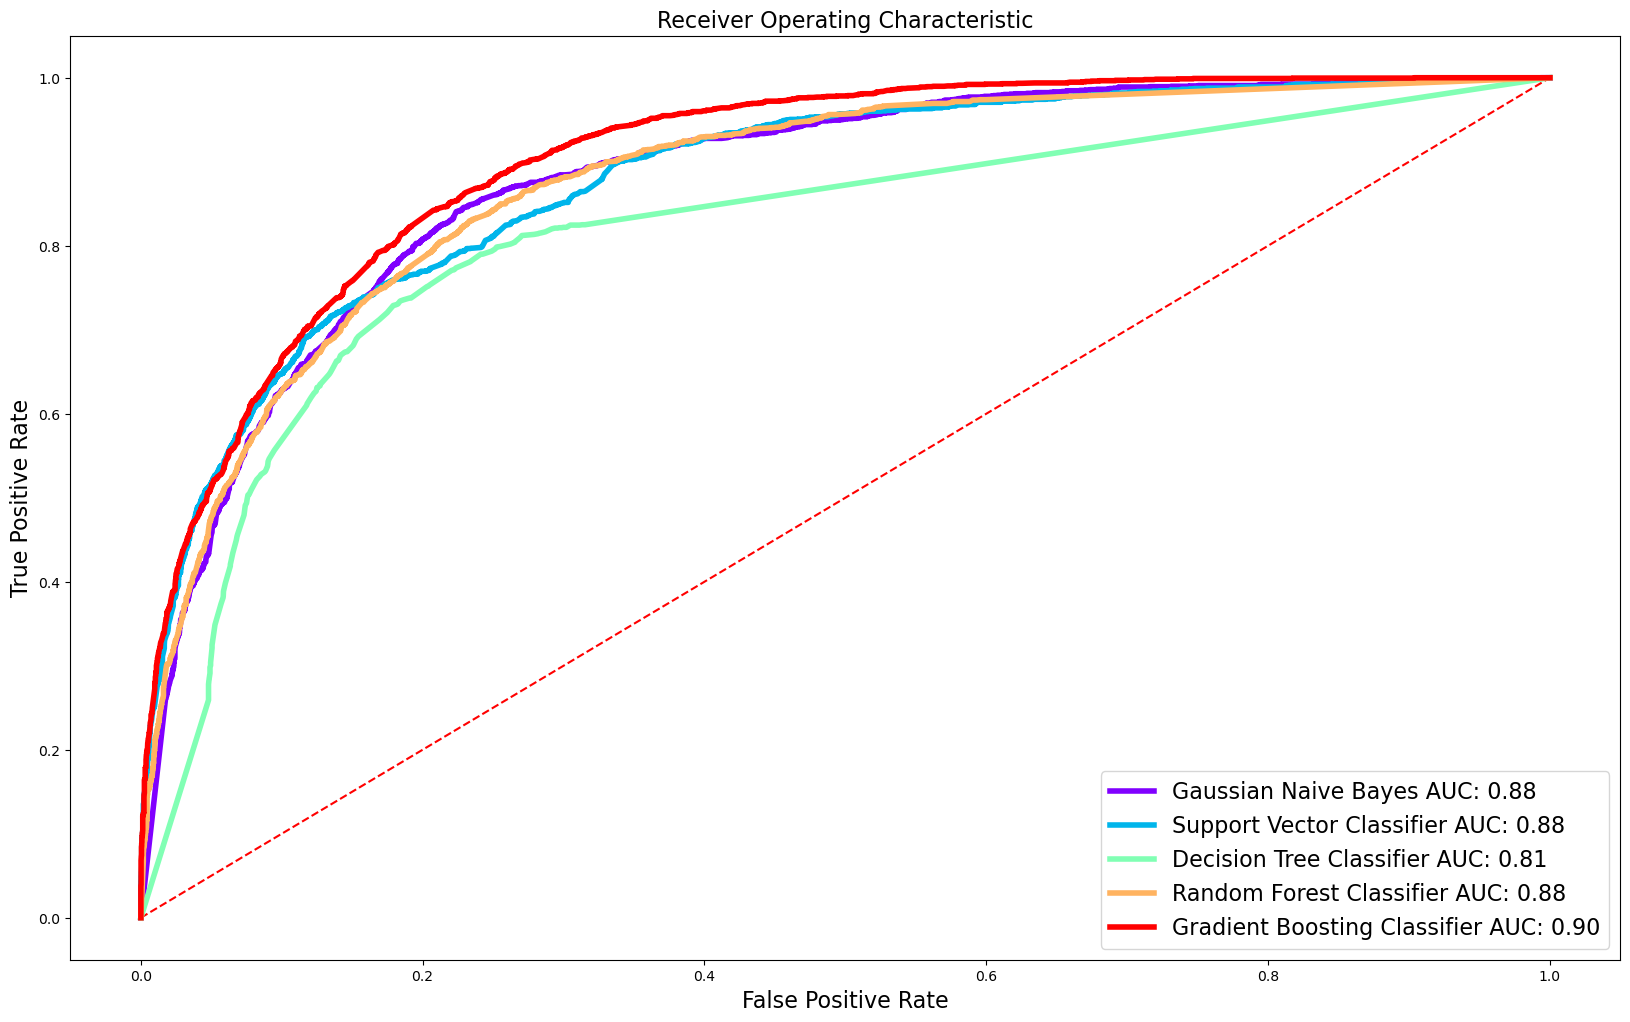

In [38]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

for i in range(len(classifiers)):
    classifier = classifiers[i]
    probs = classifier.predict_proba(X_test)
    # Reading probability of second class
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = classifier_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[i], label = label, linewidth = 4)
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

Yenə də gradient boosting təsnifatçısı 0.90 dəyəri ilə əyrinin altında maksimum sahəyə malikdir.